# Neural Networks: Introduction

**Исполнители (ФИО):** Your answer here

---

Здравствуйте, классическое Машинное Обучение подошло к концу. Далее вы познакомитесь с Введением в Глубокое Обучение и научитесь работать с полносвязными нейронными сетями прямого распространенния

`В данном блокноте вы будете работать с библиотекой PyTorch, для комфортной работы и чтобы не тратить время на установку, воспользуйтесь сервисом Google Collab, в которой этот инструмент уже предустановлен`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

Полносвязная нейронная сеть прямого распространения состоит из последовательных и связанным между собой слоев, каждый слой состоит из набора перцептронов (нейронов)

Перцептрон выражается формулой $f(\sum\limits_{i}w_{i}x_{i} + b)$, где $w_{i},b$ - веса, $x_{i}$ - входы, на первом слое - фичи, на последующих - выходы нейронов предыдущего слоя, $f$ - функция активации. Перцептрон является моделью линейной регрессии с нелинейной функцией активации

## Задача 1

Сгенерируйте данные $XOR$

In [ ]:
#Your code here

Создайте свой Перцептрон, используя пример ниже

In [12]:
# # Пример Перцептрона
# 
# class Perceptron:
# 
#     def __init__(self, n_features, act):
#         
#         # инициализация весов и функции активации
#         # requires_grad = True - для обучаемости весов (подсчета градиента)
#         self.W = torch.normal(0, 0.1, (1, n_features), requires_grad = True)
#         self.bias = torch.normal(0, 0.1, (1, 1), requires_grad = True)
#         self.act = act
# 
#     def forward(self, x):
#         
#         # f(w* x + b)
#         return self.act(torch.matmul(self.W, x.T) + self.bias)
# 
#     def parameters(self):
#         return [self.W, self.bias]

In [ ]:
#Your code here

Чтобы обучить нейронную сеть, нужно 
1. посчитать предсказание
2. посчитать штраф (функцию потерь)
3. занулить градиент
4. посчитать градиент штрафа
5. сделать шаг градиентного спуска

In [ ]:
criterion = #ваша функция потерь, например nn.BCELoss()

optimizer = #оптимизатор, например torch.optim.SGD()

n_epochs = 10 # количество эпох обучения

model = Perceptron() # нейронная сеть

for i in range(n_epochs):
    
    y_pred = model.forward(X) # предсказание
    loss = criterion(y_pred, y_true) # штраф
    
    optimizer.zero_grad() # зануляем градиенты с предыдущей итерации
    loss.backward() # считаем градиент
    optimizer.step() # шаг градиентного спуска

Если вы хотите использовать возможности видеокарты для обучения, необходимо перенести обучаемые веса и данные на *GPU* с помощью метода *.to(device)*

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.to(device)
train_data.to(device)

Обычно градиент вычисляется последовательно не от всех данных, а по кусочкам, которые называют *batch*

Обучите Перцептрон на ваших данных, сравните результат с логистической регрессией. Постройте кривую обучения Перцептрона (зависимость функции потерь и метрики от эпохи на тренировочных и валидационных данных)

In [ ]:
#Your code here

Теперь попробуйте взять несколько перцептронов с разными начальными весами и собрать их в один слой (для измените класс *Perceptron*, чтобы он содержал несколько нейронов) 

Подумайте как аггрегировать вместе предсказания нескольких нейронов (слоя)

In [ ]:
#Your code here

Сравните Перцептрон, Логистическую Регрессиию и Слой Перцептронов

In [ ]:
#Your code here

**Вопрос:** Какая модель оказалась лучше? Есть ли различие в их работе? Предположите, почему?

*Your answer here*

## Задача 2

In [11]:
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         
#         super().__init__()
#         
#         self.flatten = nn.Flatten()
# 
#         # n_i количество перцептронов на i слое
#         # соответствует количеству входов на i + 1 слое
#         self.layers_stack = nn.Sequential(
#             nn.Linear(n_features, n1),
#             nn.ReLU(), # функция активации после первого слоя
#             nn.Linear(n1, n2),
#             nn.ReLU(), # функция активации после второго слоя
#             nn.Linear(n2, n_classes)
#         )
# 
#     def forward(self, x):
#         x = self.flatten(x) # делаем данные плоскоми
#         logits = self.layers_stack(x) # применяем последовательно слои
#         return logits

Загрузите датасет *richters_whole_1.csv*

In [ ]:
#Your code here

Постройте полносвязную нейронную сеть, используя пример выше, для классификации на ваших данных

In [ ]:
#Your code here

Попробуйте разные архитектуры нейронной сети, произвольно меняя параметры: 
1. количество слоев
2. количество перцептронов в слое
3. функции активации слоя

Постройте кривую обучения Нейронной сети (зависимость функции потерь и метрики от эпохи на тренировочных и валидационных данных)

In [ ]:
#Your code here

**Вопрос:** Какая архитектура нейронной сети оказалась наилучшей для решения данной задачи?

*Your answer here*

## Задача 3

Для удобного деления данных на батчи используйте *torch.utils.data.DataLoader* 

Это необходимо, поскольку зачастую невозможно все данные поместить на *GPU*

*batch_size* ограничен сверху оперативной паматью видеокарты, а снизу - тем, что тем меньше взять данных в батч, тем хуже будет обучение весов

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,  TensorDataset

In [3]:
device = (
    "mps" if torch.backends.mps.is_available()
    else "cpu"
)
print("Using device:", device)

Using device: mps


Загрузите датасет [МNIST](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html)

In [34]:
# Преобразования: тензор + нормализация (стандартные для MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),  # [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # среднее и std по MNIST
])

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

batch_size = 128 

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


Постройте нейросеть и обучите её с разбиением на батчи. Постарайтесь добиться качества около 95%

In [38]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [39]:
model = NeuralNetwork().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 8  # где-то к 6-7 эпохе переваливает за 0.98 acc

In [40]:
for epoch in range(n_epochs):
    # ------- train -------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)              # [batch, 10]
        loss = criterion(outputs, labels)    # CE по логитам
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    # ------- eval -------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = outputs.max(1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

    test_acc = correct / total

    print(
        f"Epoch {epoch+1}/{n_epochs} | "
        f"train_loss={train_loss:.4f} | "
        f"train_acc={train_acc:.4f} | "
        f"test_acc={test_acc:.4f}"
    )

Epoch 1/8 | train_loss=0.2805 | train_acc=0.9139 | test_acc=0.9638
Epoch 2/8 | train_loss=0.1274 | train_acc=0.9607 | test_acc=0.9741
Epoch 3/8 | train_loss=0.0936 | train_acc=0.9711 | test_acc=0.9764
Epoch 4/8 | train_loss=0.0783 | train_acc=0.9751 | test_acc=0.9757
Epoch 5/8 | train_loss=0.0693 | train_acc=0.9783 | test_acc=0.9800
Epoch 6/8 | train_loss=0.0626 | train_acc=0.9804 | test_acc=0.9802
Epoch 7/8 | train_loss=0.0552 | train_acc=0.9825 | test_acc=0.9808
Epoch 8/8 | train_loss=0.0505 | train_acc=0.9838 | test_acc=0.9816


**Вопрос:** Какую архитектуру подобрали и на сколько батчей разбивали данные?

*Your answer here*

## Задача 4

Важным математическим результатом теории нейросетей является [Теорема Цыбенко](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A6%D1%8B%D0%B1%D0%B5%D0%BD%D0%BA%D0%BE), которая гласит, что для любой непрерывной функции можно подобрать веса нейросети с одним скрытым слоем и сигмоидальной функцией активации таким образом, чтобы сколько угодно точно приблизить её

В файле *signal_sample_1.csv* содержатся данные о физическом сигнале $X(t)$. Проверьте теорему Цыбенко на этих данных

In [4]:
import os

In [12]:
print(torch.backends.mps.is_available(), torch.backends.mps.is_built())

True True


In [6]:
df = pd.read_csv("signal_sample_1.csv")

# Берём только числовые колонки
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) < 2:
    raise ValueError(f"В CSV мало числовых колонок. Нашлось: {num_cols}")

t_col, x_col = num_cols[0], num_cols[1]
t = df[t_col].to_numpy().astype(np.float32)
x = df[x_col].to_numpy().astype(np.float32)

# на всякий случай сортировка по времени
idx = np.argsort(t)
t, x = t[idx], x[idx]

print("columns:", t_col, x_col, "| N:", len(t))

columns: t x | N: 59856


In [7]:
thr = np.quantile(x, 0.95)
print("share above 95%:", (x > thr).mean())

share above 95%: 0.05000334135257952


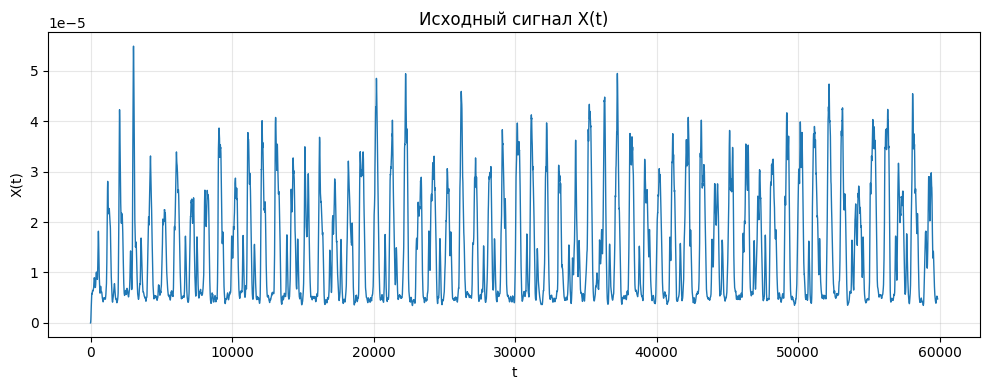

In [8]:
plt.figure(figsize=(10,4))
plt.plot(t, x, linewidth=1)
plt.title("Исходный сигнал X(t)")
plt.xlabel("t"); plt.ylabel("X(t)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# device (на M1)
device = "mps" if torch.backends.mps.is_available() else "cpu"
print("device:", device)

N = len(t)
mask_test = (torch.arange(N) % 5 == 0)   # каждый 5-й в тест
mask_train = ~mask_test

x_work = np.log1p(x) 

# Нормировку считаем по TRAIN, чтобы не было утечки
t_train_np = t[mask_train.numpy()]
x_train_np = x_work[mask_train.numpy()]

t_mean, t_std = t_train_np.mean(), t_train_np.std() + 1e-8
x_mean, x_std = x_train_np.mean(), x_train_np.std() + 1e-8

t_n = (t - t_mean) / t_std
x_n = (x_work - x_mean) / x_std

T = torch.tensor(t_n[:, None], dtype=torch.float32, device=device)
Y = torch.tensor(x_n[:, None], dtype=torch.float32, device=device)

T_train, Y_train = T[mask_train.to(device)], Y[mask_train.to(device)]
T_test,  Y_test  = T[mask_test.to(device)],  Y[mask_test.to(device)]

# "сырые" значения для метрик
x_train_raw = x[mask_train.numpy()]
x_test_raw  = x[mask_test.numpy()]
t_test_np   = t[mask_test.numpy()]




device: mps


In [10]:
class OneHiddenSigmoid(nn.Module):
    def __init__(self, hidden_size: int):
        super().__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.act = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        return self.fc2(self.act(self.fc1(x)))

In [13]:

def init_sigmoid_covering(model, T_train, w_scale=10.0):
    """
    Инициализация так, чтобы у каждой сигмоиды был свой центр переключения по t.
    """
    with torch.no_grad():
        # диапазон по t (нормированный)
        t_min = T_train.min().item()
        t_max = T_train.max().item()

        # веса: нормальные, но "резкие"
        W = torch.randn_like(model.fc1.weight) * w_scale  # [h,1]
        # центры переключения равномерно по [t_min, t_max]
        c = torch.empty(model.fc1.bias.shape, device=model.fc1.bias.device).uniform_(t_min, t_max)  # [h]
        # bias так, чтобы W*t + b = 0 при t=c  => b = -W*c
        b = -(W[:, 0] * c)

        model.fc1.weight.copy_(W)
        model.fc1.bias.copy_(b)

        # второй слой маленьким, чтобы не улететь в константу/сатурацию
        model.fc2.weight.mul_(0.1)
        model.fc2.bias.zero_()


def weighted_mse(pred, target, weight):
    return (weight * (pred - target) ** 2).sum() / weight.sum()

def sharp_init_sigmoid(model, w_scale, b_scale):
    # Делаем сигмоиды "резче": увеличиваем веса первого линейного слоя
    with torch.no_grad():
        l1 = model.net[0]  # nn.Linear(1, hidden)
        l1.weight.mul_(w_scale)
        l1.bias.mul_(b_scale)

def train_model_fullbatch(hidden_size, T_train, Y_train, T_test, Y_test, x_train_raw, w_scale,
                          epochs=2000, lr=3e-3, alpha=50.0, print_every=200, device="cpu"):
    model = OneHiddenSigmoid(hidden_size).to(device)
    init_sigmoid_covering(model, T_train, w_scale=w_scale)

    opt = torch.optim.LBFGS(model.parameters(), lr=1.0, max_iter=20, line_search_fn="strong_wolfe")


    q95 = np.quantile(x_train_raw, 0.95)
    w = np.ones_like(x_train_raw, dtype=np.float32)
    w[x_train_raw > q95] = 1.0 + alpha
    W = torch.tensor(w[:, None], dtype=torch.float32, device=device)

    for epoch in range(1, epochs + 1):
        model.train()
        pred = model(T_train)
        loss = weighted_mse(pred, Y_train, W)

        opt.zero_grad()
        loss.backward()
        opt.step()
        

        if epoch % print_every == 0 or epoch == 1:
            model.eval()
            with torch.no_grad():
                # MSE в нормированной (обучающей) шкале
                tr = nn.MSELoss()(model(T_train), Y_train).item()
                te = nn.MSELoss()(model(T_test),  Y_test ).item()
        
                # RMSE в исходной шкале x(t) (чтобы ответить “с какой точностью восстановили”)
                pred_te_n = model(T_test)
                pred_te_log = pred_te_n * x_std + x_mean     # обратно в log1p-шкалу
                pred_te = torch.expm1(pred_te_log)           # обратно в x-шкалу
                true_te = torch.expm1(Y_test * x_std + x_mean)
        
                rmse = torch.sqrt(torch.mean((pred_te - true_te) ** 2)).item()
        
            print(f"h={hidden_size:4d} | epoch={epoch:4d} | train_mse={tr:.6f} | test_mse={te:.6f} | test_rmse={rmse:.6e}")

    return model, q95

In [14]:
hidden_list = [1000, 2000, 4000, 7000, 10000]
models = {}
w_sc_list =[5,10,20,50]

In [15]:

for h in hidden_list:
    for w in w_sc_list:
        print("\n--- training h =", h, "w_scale = ", w, "---")
        model_h, q95 = train_model_fullbatch(
            hidden_size=h,
            T_train=T_train, Y_train=Y_train,
            T_test=T_test,   Y_test=Y_test,
            x_train_raw=x_train_raw,
            epochs=2000, lr=3e-3, alpha=50,
            device=device,
            w_scale=w
        )
        models[(h, w)] = (model_h, q95)


--- training h = 1000 w_scale =  5 ---


TypeError: LBFGS.step() missing 1 required positional argument: 'closure'

In [105]:
def rmse(a, b):
    a = np.asarray(a); b = np.asarray(b)
    return np.sqrt(np.mean((a - b) ** 2))

# берём лучшую модель
best_h = 200
best_w = 50
best_model, q95 = models[(best_h, best_w)]

best_model.eval()
with torch.no_grad():
    pred_test_n = best_model(T_test).detach().cpu().numpy().reshape(-1)

pred_test = pred_test_n * x_std + x_mean
true_test = x_test_raw

mask_peak = true_test > q95
mask_bg = ~mask_peak

print("RMSE all :", rmse(true_test, pred_test))
print("RMSE peak:", rmse(true_test[mask_peak], pred_test[mask_peak]))
print("RMSE bg  :", rmse(true_test[mask_bg], pred_test[mask_bg]))

RMSE all : 2.0133222e-05
RMSE peak: 8.011573e-06
RMSE bg  : 2.0570022e-05


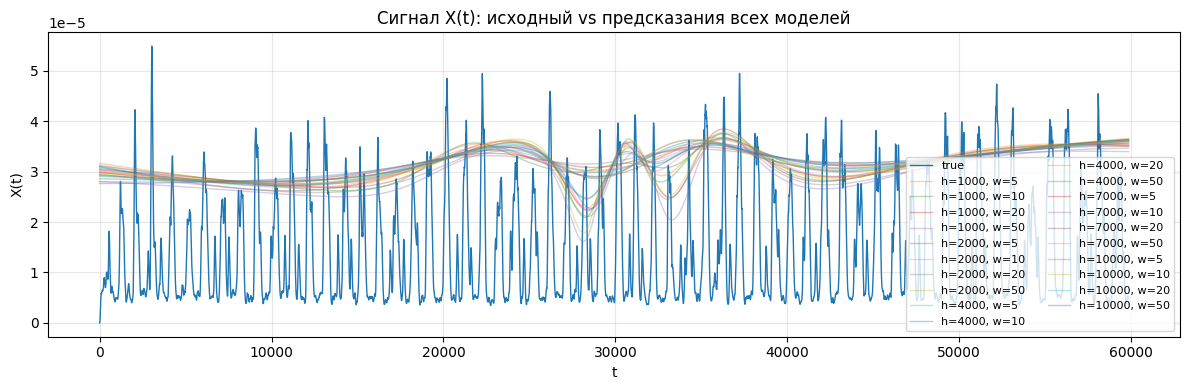

In [107]:
plt.figure(figsize=(12, 4))
plt.plot(t, x, label="true", linewidth=1)

for (h, w), (m, q95) in models.items():
    m.eval()
    with torch.no_grad():
        pred_all_n = m(T).detach().cpu().numpy().reshape(-1)

    pred_all_log = pred_all_n * x_std + x_mean
    pred_all = np.expm1(pred_all_log)

    plt.plot(t, pred_all, linewidth=1, alpha=0.35, label=f"h={h}, w={w}")

plt.title("Сигнал X(t): исходный vs предсказания всех моделей")
plt.xlabel("t"); plt.ylabel("X(t)")
plt.grid(True, alpha=0.3)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

Визуализируйте сигнал и подобранную нейросетью функцию

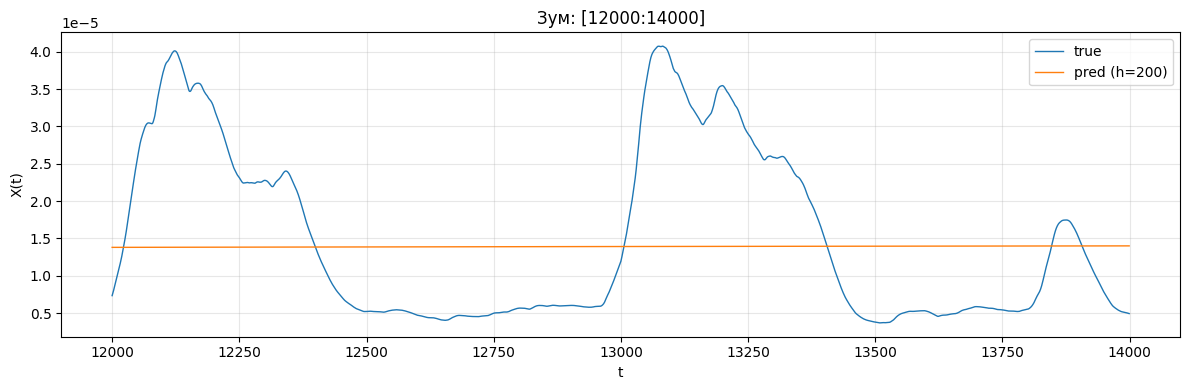

In [94]:
i0, i1 = 12000, 14000  # поменяй на любой отрезок
plt.figure(figsize=(12, 4))
plt.plot(t[i0:i1], x[i0:i1], label="true", linewidth=1)
plt.plot(t[i0:i1], pred_all[i0:i1], label=f"pred (h={best_h})", linewidth=1)
plt.title(f"Зум: [{i0}:{i1}]")
plt.xlabel("t"); plt.ylabel("X(t)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# предсказание на всей сетке t (в исходном порядке)
best_model.eval()
with torch.no_grad():
    pred_n = best_model(T.to(device)).cpu().numpy().reshape(-1)

# обратно из нормировки
pred = pred_n * x_std + x_mean

plt.figure(figsize=(10,4))
plt.plot(t, x, label="true", linewidth=1)
plt.plot(t, pred, label=f"MLP(1 hidden, sigmoid), h={best_h}", linewidth=1)
plt.title("Аппроксимация X(t) нейросетью с 1 скрытым слоем (Sigmoid)")
plt.xlabel("t"); plt.ylabel("X(t)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Вопрос:** С какой точностью получилось восстановить функцию сигнала?

*Your answer here*